# beam_propagation.py

Ce code a pour but de faire des calculs simples de faisceaux gaussiens, de prédire comment ils se transforme à travers des lentilles et de simuler le couplage que l'on mesure avec un cornet de réception.

In [1]:
from beam_propagation import *
import matplotlib.pyplot as plt

## 1. Variables globales du code

* `FREQ` correspond à la fréquence à laquelle on travaille
* `OMEGA_0` correspond à la taille du waist du cornet de réception pour les calculs de couplage.


## 2. Définition du meshing
Au début du code, définir les paramètres `L_x`, `L_z` en mètres, puis le nombre de pixels sur la grille de calcul `N_x` et `N_y`.





## 3. Création d'un faisceau

Pour créer un faisceau, on appel la classe `Gaussian_beam`.

On peut visualiser le faisceau à l'aide des différentes fonctions:
* `plot_norm()`: représenation de la norme du champ complexe E.
* `plot_field()`: représentation de la partie réelle du champ complexe E.
* `plot_env()`: affiche l'enveloppe en 1/e du champ.

Il est possible de superposer les affichages. À la fin de chaque petite simulation, il faut "nettoyer" toute la mémoire avec `reset_beams()`.

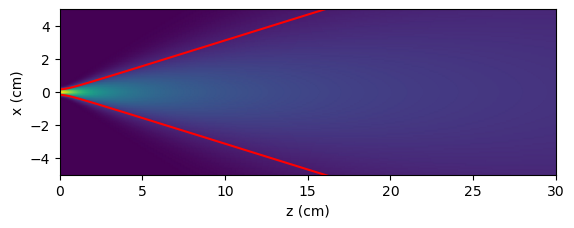

In [5]:
Beam = Gaussian_beam(w0=OMEGA_0, z0=0)

plot_norm()
plot_env()

reset_all()

## 4. Création de système optiques

On défini d'abord nos lentilles puis notre faisceau. **C'est une fois qu'on a défini les lentilles que l'on défini les faisceaux!**

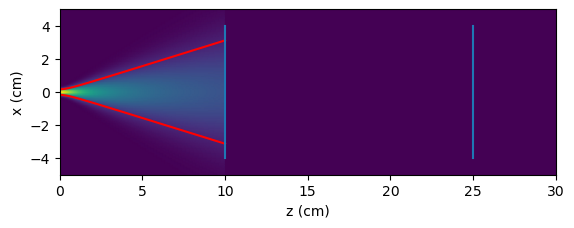

In [7]:
# Une lentille de focale 100mm
L1 = Thin_lens(pos = 100e-3, f=100e-3, diameter=8e-2)
# On peut aussi définir une lentille à partir de ses paramètres ABCD
L2 = Optical_system(A=1, B=0, C=-1/(50e-3), D=1, pos=250e-3, diameter=0.08)

Beam = Gaussian_beam(w0=OMEGA_0, z0=0)

plot_norm()
plot_env()

reset_all()

On peut voir que le faisceau s'arrête juste au  niveau de la première lentille. Il faut utiliser la fonction `compute_beam_transformation` pour créer d'autres instances de `Gaussian_beam`. Le programme ne calcule que la propagation de la gauche vers la droite.

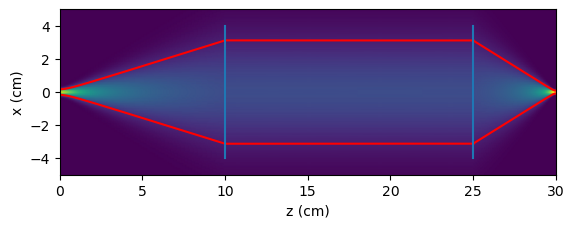

In [4]:
# On défini les lentilles
L1 = Thin_lens(pos = 100e-3, f=100e-3, diameter=8e-2)
L2 = Thin_lens(pos = 250e-3, f=50e-3, diameter=8e-2)

# On créer le faisceau
Beam = Gaussian_beam(w0=OMEGA_0, z0=0)

# On calcul la propagation
compute_beam_transformation()

#On affiche
plot_norm()
plot_env()

# On nettoie
reset_all()

## 5. Obtenir les paramètres des faisceaux

On peut afficher la liste des paramètre de faisceaux, cela se lit de la gauche vers la droite comme sur le graphique.

LAMBDA=1.6666666666666667 mm
z0 : [0]
w0 : [0.02]
Zc : [0.7539822368615503]
Theta : [0.02651960511300288]


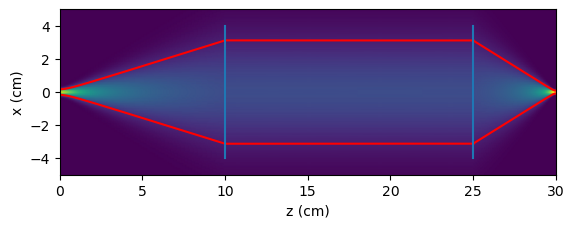

In [10]:
# On défini les lentilles
L1 = Thin_lens(pos = 100e-3, f=100e-3, diameter=8e-2)
L2 = Thin_lens(pos = 250e-3, f=50e-3, diameter=8e-2)

# On créer le faisceau
Beam = Gaussian_beam(w0=OMEGA_0, z0=0)

# On calcul la propagation
compute_beam_transformation()

# On affiche
plot_norm()
plot_env()

# On regarde les paramètres:
print(f"LAMBDA={LAMBDA*1e3} mm")
print(f"z0 : {[beam.z0 for beam in  BEAMS]}") #Indique la position z0 des faisceaux de gauche à droite
print(f"w0 : {[beam.w0 for beam in  BEAMS]}")   #idem avec les waists w0
print(f"Zc : {[beam.zr for beam in  BEAMS]}")   #idem
print(f"Theta : {[beam.theta for beam in  BEAMS]}")

# On nettoie
reset_all()

**NB:** Les distances sont toujours affichées en m.

## 6. Calculs de couplage

Pour les calculs de couplage, on considère le faisceau en 2D, c'est-à-dire que ce qui est affiché n'est qu'une projection sur le plan (Oxz). Les calculs de couplage ne sont en effet pas les même pour des faisceaux 1D ou 2D.

Il existe deux fonctions pour le couplage:
* `coupling()` qui utilise les formules analytiques de Goldsmith
* `numerical_coupling()` qui calcule le couplage avec des intégrales sur un plan z=cste au choix.

On peut vérifier que les deux fonctions donnent le même résultat:

Méthode Goldsmith: K=0.0025382579847806706
Méthode numérique: K=0.00253825796392163


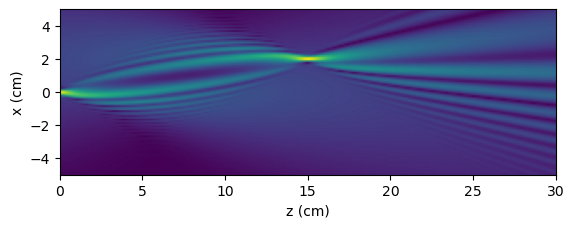

In [20]:
# On créer les faisceaux
Beam1 = Gaussian_beam(w0=OMEGA_0, z0=0)
Beam2 = Gaussian_beam(w0=OMEGA_0, z0=0.15, x0=0.02)

# On calcule les couplages
print(f"Méthode Goldsmith: K={coupling(Beam1, Beam2)}")
print(f"Méthode numérique: K={numerical_coupling(Beam1, Beam2, z=0.10)}")

# On affiche
plot_norm()

# On nettoie
reset_all()

## 7. Balayage avec un récepteur

On peut également simuler les mesures d'un faisceau des balayages avec un récepteur à la fin du trajet optique. Le balayage se fait en fonction de x et z et peut se visualiser en 3D:

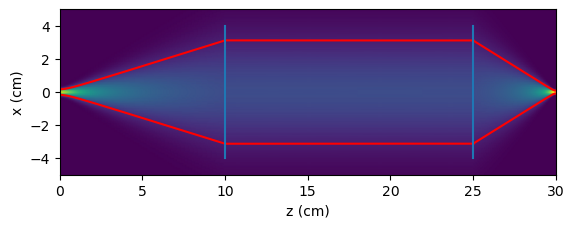

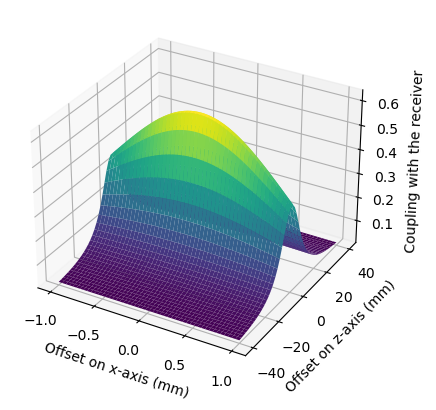

In [21]:
# On défini les lentilles
L1 = Thin_lens(pos = 100e-3, f=100e-3, diameter=8e-2)
L2 = Thin_lens(pos = 250e-3, f=50e-3, diameter=8e-2)

# On créer le faisceau
Beam = Gaussian_beam(w0=OMEGA_0, z0=0)

# On calcul la propagation
compute_beam_transformation()

# On affiche
plot_norm()
plot_env()
plt.show()

# Balayage
receptor_sweep_xz(xmin=-1e-3, xmax=1e-3, zmin=0.26, zmax=0.34, N=50)

# On nettoie
reset_all()
